***I preprocessed the dataset because it contained unnecessary characters. I removed them and kept only letters and the apostrophe. Then, I converted all letters to lowercase because I needed to train the model on lowercase text. The STT model outputs text only in lowercase. I initially overlooked this issue when training the first NER model. However, after integrating it with the STT model, I realized the mistake. So, I converted all letters in the dataset to lowercase. As a result, the model started performing better with lowercase text. You can see the preprocessing and cleaning results below.***

In [1]:
! pip install seqeval
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=de20e46ee3b9c55dc375b7985225b53aaaf4a15e5069856ba48b01fa7f4717f9
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.3 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset, Dataset
from tqdm import tqdm
import re

In [4]:
import pandas as pd

df = pd.read_json("hf://datasets/risqaliyevds/uzbek_ner/uzbek_ner.json")

Find the total `number of entities` in the NER column of the dataset

In [5]:
from collections import defaultdict

def get_charset(data):
    charset = defaultdict(int)
    for row in data.index:
        text = data.loc[row, 'ner']
        for character in text:
            charset[character] += 1
    return charset

x = get_charset(df)

In [6]:
print(x)

defaultdict(<class 'int'>, {'GPE': 19503, 'LOC': 18898, 'ORG': 18155, 'PERSON': 11999, 'DATE': 6271, 'EVENT': 2735, 'WORK_OF_ART': 251, 'FACILITY': 2840, 'LAW': 361, 'MONEY': 2255, 'PERCENT': 448, 'PRODUCT': 1078, 'NORP': 319, 'TIME': 608, 'QUANTITY': 341, 'ORDINAL': 45, 'CARDINAL': 149, 'LANGUAGE': 285, 'PER': 1, 'JCH-2022': 1, 'RASUM': 1, 'EMAIL': 5, 'PHONE': 9, 'SOCIAL_MEDIA': 1, 'WEBSITE': 1, 'JOURNAL': 1, 'PERIOD': 4, 'FAC': 1, 'MISC': 3})


### ***Visualization***

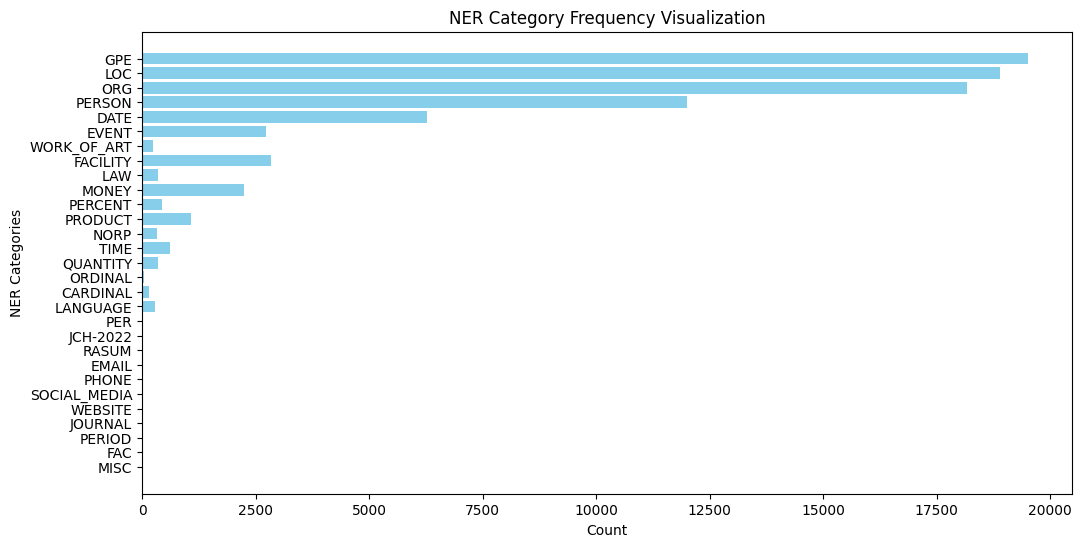

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Kiritilgan defaultdict ma'lumotlari
ner_counts = defaultdict(int, {
    'GPE': 19503, 'LOC': 18898, 'ORG': 18155, 'PERSON': 11999, 'DATE': 6271, 'EVENT': 2735,
    'WORK_OF_ART': 251, 'FACILITY': 2840, 'LAW': 361, 'MONEY': 2255, 'PERCENT': 448, 
    'PRODUCT': 1078, 'NORP': 319, 'TIME': 608, 'QUANTITY': 341, 'ORDINAL': 45, 
    'CARDINAL': 149, 'LANGUAGE': 285, 'PER': 1, 'JCH-2022': 1, 'RASUM': 1, 
    'EMAIL': 5, 'PHONE': 9, 'SOCIAL_MEDIA': 1, 'WEBSITE': 1, 'JOURNAL': 1, 
    'PERIOD': 4, 'FAC': 1, 'MISC': 3
})

# Kategoriyalar va qiymatlarni ajratish
labels, values = zip(*ner_counts.items())

# Grafikni chizish
plt.figure(figsize=(12, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Count")
plt.ylabel("NER Categories")
plt.title("NER Category Frequency Visualization")
plt.gca().invert_yaxis()  # Kategoriya nomlarini yuqoridan pastga ko'rsatish
plt.show()


*From the visualization results, it is evident that the most frequent entities are GPE, LOC, ORG, PERSON, and DATE*

### View the characters in the text column of the dataset.

In [8]:
from collections import defaultdict

def get_charset(data):
    charset = defaultdict(int)
    for row in data.index:
        text = data.loc[row, 'text']
        for character in text:
            charset[character] += 1
    return charset

x = get_charset(df)

In [9]:
x.keys()

dict_keys(['S', 'h', 'v', 'e', 't', 's', 'i', 'y', 'a', ' ', 'u', 'k', 'm', 'o', 'l', 'd', 'g', 'p', 'r', '‘', 'c', 'D', 'n', 'b', 'q', 'x', '.', 'B', 'E', 'T', 'V', 'f', 'z', 'L', "'", 'U', 'j', 'O', ',', '5', 'R', 'A', 'Q', '"', '?', 'Y', 'J', '-', 'K', 'I', '9', 'Z', '2', 'P', '«', 'H', '»', '\xa0', '3', '1', '0', 'X', '’', 'N', 'w', '8', 'F', 'M', '—', '4', '7', 'G', '!', '–', '6', '/', '“', '”', '(', ')', ':', 'W', 'C', '−', '…', ';', '&', '$', '•', 'ʼ', '+', '@', 'Ö', '‑', 'ü', '`', '=', '_', 'Ⓣ', '\u200b', 'Ü', 'İ', '➖', '👈', '❤', '️', '☎', '🤝', '#', '%', 'ç', 'é', 'à', '[', ']', '🙏', '🏼', '✅', '📞', '🌐', '📲', 'É', '*', '€', '„', 'ä', '°', 'ğ', 'ң', 'í', 'Č', '×', 'ň', '⚽', '🔢', '👑', '🤔', '🇳', '🇬', '🏴', '\U000e0067', '\U000e0062', '\U000e0065', '\U000e006e', '\U000e007f', 'ı', '²', '⃣', '|', 'ë', '🆕', '👋', '🔴', '👉', '№', '©', '¼', '′', 'ã', '真', 'ん', '中', '小', '五', '郎', 'ó', 'á', 'Ş', '⁃', '❗', '⠀', 'â', '\u200f', 'ö', '\xad', '─', '🤣', '📹', '¬', 'ֹ', 'ø', 'م', 'ش', 'ا', 'و', 'ر'

### Convert Roman numerals and numbers replace to words.

In [10]:
# 1. Roman digits convert to words.
def roman2digit(s):
    roman = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000,'IV':4,'IX':9,'XL':40,'XC':90,'CD':400,'CM':900}
    i = 0
    num = 0
    while i < len(s):
        if i+1<len(s) and s[i:i+2] in roman:
            num+=roman[s[i:i+2]]
            i+=2
        else:
            num+=roman[s[i]]
            i+=1
    return num

def replace_roman(match):
    matched = match.group(2)
    # IIV is not roman digit. It means "Ichki ishlar vazirligi"
    if matched == 'IIV':
        return match.group(1)+'iiv'+match.group(3)
    number = roman2digit(matched)
    word = num2word(number)
    if word[-1] == 'i' or word[-1] == 'a':
        word += 'nchi'
    else:
        word += 'inchi'
    if match.group(1)=='-' or match.group(3)=='-':
        return ' '+word+' '
    else:
        return match.group(1)+word+match.group(3)


# 2. Numbers to words
def three_digit(a):
    yuz = a // 100
    on = a // 10 % 10
    bir = a % 10
    word = ''
    # yuzlar xonasi

    if yuz == 1:
        word +="bir"
    elif yuz == 2:
        word += "ikki"
    elif yuz == 3:
        word += "uch"
    elif yuz == 4:
        word += "toʻrt"
    elif yuz == 5:
        word += "besh"
    elif yuz == 6:
        word += "olti"
    elif yuz == 7:
        word += "yetti"
    elif yuz == 8:
        word += "sakkiz"
    elif yuz == 9:
        word += "toʻqqiz"
    if yuz != 0:
        word += " yuz"

    # o'nlar xonasi

    if on == 1:
        word += " oʻn"
    elif on == 2:
        word += " yigirma"
    elif on == 3:
        word += " oʻttiz"
    elif on == 4:
        word += " qirq"
    elif on == 5:
        word += " ellik"
    elif on == 6:
        word += " oltmish"
    elif on == 7:
        word += " yetmish"
    elif on == 8:
        word += " sakson"
    elif on == 9:
        word += " toʻqson"

    # birlar xonasi

    if bir == 1:
        word +=" bir"
    elif bir == 2:
        word += " ikki"
    elif bir == 3:
        word += " uch"
    elif bir == 4:
        word += " toʻrt"
    elif bir == 5:
        word += " besh"
    elif bir == 6:
        word += " olti"
    elif bir == 7:
        word += " yetti"
    elif bir == 8:
        word += " sakkiz"
    elif bir == 9:
        word += " toʻqqiz"
    
    return word

def num2word(n):
    if n == 0:
        return 'nol'
    names = ["", "ming", "million", "milliard", "trillion", "kvadrillion", "kvintillion", "sekstillion", "septillion", "oktalon", "nonalon", "dekalon", "endekalon", "dodekalon"]
    digit = 0
    word = ''
    d = n
    while d > 0:
        d //= 10
        digit += 1

    if digit % 3 == 0:
        x = 0
    else:
        x = 1
    while n > 0:
        if x:
            k = n // 10 ** (digit - digit % 3)
            n %= 10 ** (digit - digit % 3)
        else:
            k = n // 10 ** (digit-3)
            n %= 10 ** (digit-3)
        word += three_digit(k)+' '
        if x:
            word += names[digit//3]+' '
        else:
            word += names[digit//3-1]+' '
        if x:
            digit -= digit % 3
            x = 0
        else:
            digit -= 3

    return word.strip()

def float_num2word(n):
    tens = [' oʻndan ', 'yuzdan ', 'mingdan ', ' oʻn mingdan ', ' yuz mingdan ', ' milliondan ']
    whole = n.split('.')[0]
    frac = n.split('.')[1]
    if frac == '0':
        return num2word(int(whole))
    return num2word(int(whole)) + ' butun ' + tens[len(frac) - 1]+num2word(int(frac))

### List of characters that should remain in the dataset, convert to lowercase

In [11]:

def replace_digit(match):
    if len(match.groups()) == 3:
        # I. ':' orqali ajratilgan raqamlar -> "u" yoki "yu" qo‘shish sharti bilan.
        first = num2word(int(match.group(1)))
        second = num2word(int(match.group(3)))

        if match.group(3)[-1] in "134579":  # Agar oxirgi raqam 1, 3, 4, 5, 7, 9 bo'lsa
            return first + "u " + second
        else:
            return first + "yu " + second

    elif len(match.groups()) == 2:
        # II. Son va '-' bo‘lsa uni tartib raqam shakliga o‘tkazish
        num = num2word(int(match.group(1)))
        if num[-1] in "ai":  # Agar oxirgi harf 'a' yoki 'i' bo‘lsa
            return num + "nchi "
        else:
            return num + "inchi "
    
    else:
        # III. Barcha boshqa sonlarni oddiy so‘z shakliga o‘tkazish
        return num2word(int(match.group()))


# Tozalash funksiyasi
def clean_text(df):
    characters = [
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 

        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 
        'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
        'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 

        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
        'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 
        's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 

        ' ', "ʻ" ,"′", "ʼ", "’", "'", "‘", '\n', '\-',':','>'
    ]

    for i in tqdm(df.index):
        # Raqamli yozuvlarni almashtirish
        if re.search(r"\d+\:\d+", df.loc[i, 'text']):
            df.loc[i, 'text'] = re.sub(r"(\d+)(\:)(\d+)", replace_digit, df.loc[i, 'text'])
        if re.search(r"\d(\.|,)\d", df.loc[i, 'text']):
            df.loc[i, 'text'] = re.sub(r"(\d+)(\.|,)(\d+)", replace_digit, df.loc[i, 'text'])
        if re.search(r"\d+-", df.loc[i, 'text']):
            df.loc[i, 'text'] = re.sub(r"(\d+)(-)", replace_digit, df.loc[i, 'text'])
        if re.search(r"\d+", df.loc[i, 'text']):
            df.loc[i, 'text'] = re.sub(r"\d+", replace_digit, df.loc[i, 'text'])

        # Belgilarni tozalash
        df.loc[i, 'text'] = re.sub(f"[^{''.join(characters)}]", r" ", df.loc[i, 'text'])

        df.loc[i, 'text'] = re.sub(r'-',' ', df.loc[i, 'text'])
        df.loc[i, 'text'] = df.loc[i, 'text'].lower().strip()

    return df  # Tozalangan DataFrame`ni qaytarish


### Remove unnecessary characters

In [12]:
clean_text(df)

100%|██████████| 19609/19609 [00:10<00:00, 1948.09it/s]


,text,ner
0,shvetsiya hukumati stokholmdagi asosiy piyodal...,"{'GPE': ['Shvetsiya', 'O‘zbekiston', 'Shvetsiy..."
1,turkiya prezidenti rajab toyyib erdo‘g‘an aqsh...,"{'GPE': ['O‘zbekiston', 'Suriya', 'AQSh', 'Vas..."
2,stokholm markazida yuk mashinasi orqali sodir ...,"{'LOC': ['Stokholm', 'Stokgolm'], 'GPE': ['O‘z..."
3,vest hem bosh murabbiyi slaven bilich o‘z vaz...,"{'GPE': ['O‘zbekiston', 'Angliya'], 'ORG': ['V..."
4,aqsh prezidenti donald trampning nabirasi be...,"{'PERSON': ['Donald Tramp', 'Ivanka Tramp', 'S..."
...,...,...
19604,ikki ming yigirma ikkinchi ikki ming yigirma...,"{'GPE': ['O‘zbekiston', 'Qoraqalpog‘iston Resp..."
19605,o‘zbekistonda erkaklar o‘rtacha yigirma oltiu ...,"{'GPE': ['O‘zbekiston', 'Qoraqalpog‘iston', 'A..."
19606,konstitutsion islohotlar muhokamasiga oid yig‘...,"{'LOC': ['Toshkent', 'O‘zbekiston'], 'ORG': ['..."
19607,toshkent shahrida issiq suv ta’minoti vaqtinch...,"{'LOC': ['Toshkent', 'Mirobod', 'Yakkasaroy', ..."


In [13]:
from collections import defaultdict

def get_charset(data):
    charset = defaultdict(int)
    for row in data.index:
        text = data.loc[row, 'text']
        for character in text:
            charset[character] += 1
    return charset

x = get_charset(df)

In [14]:
x.keys()

dict_keys(['s', 'h', 'v', 'e', 't', 'i', 'y', 'a', ' ', 'u', 'k', 'm', 'o', 'l', 'd', 'g', 'p', 'r', '‘', 'c', 'n', 'b', 'q', 'x', 'f', 'z', "'", 'j', 'ʻ', '’', 'w', ':', 'ʼ', '′'])

*Now, only the necessary characters remain. 🤩*

**Create empty dataframe**

In [23]:
df_ner = pd.DataFrame()

### Clean the values of the NER column

Each entity contained multiple values separated by commas. To prevent them from merging, I replaced the comma with a character that was not in the list of unnecessary characters, specifically the ">" symbol. After removing unnecessary characters from the entity, I converted this symbol back to a comma when restoring the original format. If I had used a character from the unnecessary list or kept the comma, the `clean_text()` function would have removed them, making it impossible to restore the originally comma-separated entity values. The solution was to use this symbol as a placeholder for the previous comma, ensuring proper separation. 😎

In [24]:
df_list=[]
for i in df['ner']:
    list_set = list(i.values())
    for j in list_set:
        df_list.append('>'.join(j))

df_ner['text'] = df_list

In [25]:
from collections import defaultdict

def get_charset(data):
    charset = defaultdict(int)
    for row in data.index:
        text = data.loc[row, 'text']
        for character in text:
            charset[character] += 1
    return charset

x = get_charset(df_ner)

In [26]:
x.keys()

dict_keys(['S', 'h', 'v', 'e', 't', 's', 'i', 'y', 'a', '>', 'O', '‘', 'z', 'b', 'k', 'o', 'n', ' ', 'r', 'f', 'L', 'D', 'g', 'd', 'l', 'm', 'p', 'u', 'A', 'Q', 'V', 'q', 'c', 'R', 'j', 'T', 'E', 'J', '-', 'K', 'Y', 'H', 'X', 'P', 'B', 'U', '2', '0', '1', '5', 'I', 'x', 'F', 'M', 'N', '7', '4', "'", 'G', 'w', 'W', '8', ',', 'C', '6', 'Z', '3', '−', '.', '9', '—', ':', '(', ')', '+', '–', 'ü', '’', '@', '_', '/', 'Ü', 'İ', '“', '”', '&', ';', '%', '«', '»', '$', '€', '#', 'í', 'é', 'ë', '°', '\xa0', '′', 'ã', '小', '五', '郎', 'ó', 'á', '"', 'ı', 'ʼ', 'Ş', 'à', '?', '[', ']', '!', '№', 'у', 'ø', 'Č', '─', '`', '=', 'Ø', 'Ç', 'ö', 'ş', 'і', 'ô', 'Ö', '|'])

### Remove unnecessary characters

In [27]:
clean_text(df_ner)

100%|██████████| 86569/86569 [00:26<00:00, 3277.68it/s]


,text
0,shvetsiya>o‘zbekiston>shvetsiya bosh vaziri st...
1,drottninggatanda>stokholmdagi
2,spendrups kompaniyasi
3,shvetsiya bosh vaziri stefan lyoven
4,o‘zbekiston>suriya>aqsh>vashington
...,...
86564,toshiem
86565,o‘zbekiston>hindiston>assam>megxalaya
86566,hindiston shimoli sharqi>shimoli sharqiy assam...
86567,o‘zbekiston prezidenti>hindiston prezidenti>hi...


In [28]:
from collections import defaultdict

def get_charset(data):
    charset = defaultdict(int)
    for row in data.index:
        text = data.loc[row, 'text']
        for character in text:
            charset[character] += 1
    return charset

x = get_charset(df_ner)

In [29]:
x.keys()

dict_keys(['s', 'h', 'v', 'e', 't', 'i', 'y', 'a', '>', 'o', '‘', 'z', 'b', 'k', 'n', ' ', 'r', 'f', 'l', 'd', 'g', 'm', 'p', 'u', 'q', 'c', 'j', 'x', 'ʻ', "'", 'w', ':', '’', '′', 'ʼ'])

*> was used to separate entities when restoring them to their original form because this character is not in the list of unnecessary characters*

### Restore the NER column to its original structure

In [30]:
index=0

for i in tqdm(df.index):
    for j in df['ner'][i].keys():
        ner_item = df_ner.text[index].split('>')
        df['ner'][i][j] = ner_item
        index += 1


100%|██████████| 19609/19609 [00:01<00:00, 16965.88it/s]


In [31]:
df

,text,ner
0,shvetsiya hukumati stokholmdagi asosiy piyodal...,"{'GPE': ['shvetsiya', 'o‘zbekiston', 'shvetsiy..."
1,turkiya prezidenti rajab toyyib erdo‘g‘an aqsh...,"{'GPE': ['o‘zbekiston', 'suriya', 'aqsh', 'vas..."
2,stokholm markazida yuk mashinasi orqali sodir ...,"{'LOC': ['stokholm', 'stokgolm'], 'GPE': ['o‘z..."
3,vest hem bosh murabbiyi slaven bilich o‘z vaz...,"{'GPE': ['o‘zbekiston', 'angliya'], 'ORG': ['v..."
4,aqsh prezidenti donald trampning nabirasi be...,"{'PERSON': ['donald tramp', 'ivanka tramp', 's..."
...,...,...
19604,ikki ming yigirma ikkinchi ikki ming yigirma...,"{'GPE': ['o‘zbekiston', 'qoraqalpog‘iston resp..."
19605,o‘zbekistonda erkaklar o‘rtacha yigirma oltiu ...,"{'GPE': ['o‘zbekiston', 'qoraqalpog‘iston', 'a..."
19606,konstitutsion islohotlar muhokamasiga oid yig‘...,"{'LOC': ['toshkent', 'o‘zbekiston'], 'ORG': ['..."
19607,toshkent shahrida issiq suv ta’minoti vaqtinch...,"{'LOC': ['toshkent', 'mirobod', 'yakkasaroy', ..."


### Save model

In [ ]:
df.to_csv('uz_ner_lowercase.csv', index=False)

#### DataFrame to hugging face dataset format

In [32]:
dataset = Dataset.from_pandas(df)